### TDI Project -  Predict Ted Talks Number of Views on its Platform
### Reza Taeb - The Data Incubator Fellow

Source of Data:
https://data.world/owentemple/ted-talks-complete-list

<br> 

### Main Goal 

In this project, I am trying to predict the number of views of TED Talks on its online platform based on some features - mainly transcript of the talk and areas of the talk (tags).

### Users

The possible audience of this project can be anyone who wants to give a talk in different realms and topics. Possible users can revise contents of their talks (transcripts) based on the outputs of the future web application. For now, users can benefit from some suggestions which will be mentioned at the end of this notebook. 

### Dataset 

The original dataset is captured from https://data.world/owentemple/ted-talks-complete-list 

This dataset contains all uploaded TED Talks on its platform (2475 talks each with 123 attributes) till June 2017. Some of the features are: Speaker name, Headline, URL, Transcript, Month filmed, Year filmed, Event, Duration, Date published, View as of June 2017, Tags, and etc.  

<br>

In [79]:
# Importing Necessary Packages and Libraries

import pandas as pd 
import seaborn as sns
import numpy as np
import time
import re
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from collections import defaultdict
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
%matplotlib inline

In [2]:
pwd

'/Users/rtmac/Data_Science/TDI/capstone_project'

In [3]:
df = pd.read_csv("Data/TED_Talks_by_ID_plus-transcripts-and-LIWC-and-MFT-plus-views.csv")

In [4]:
# Take a look at data summary 
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Data columns (total 123 columns):
id                      2475 non-null int64
speaker                 2475 non-null object
headline                2475 non-null object
URL                     2475 non-null object
description             2475 non-null object
transcript_URL          2386 non-null object
month_filmed            2475 non-null int64
year_filmed             2475 non-null int64
event                   2475 non-null object
duration                2475 non-null object
date_published          2475 non-null object
views_as_of_06162017    2474 non-null float64
tags                    2475 non-null object
transcript              2386 non-null object
notes                   4 non-null object
WC                      2386 non-null float64
Analytic                2386 non-null float64
Clout                   2386 non-null float64
Authentic               2386 non-null float64
Tone                    2386 non-null 

In [5]:
def display_all(data):
    with pd.option_context("display.max_rows", 10000, "display.max_columns", 10000): 
        display(data)

In [6]:
# Take a more deeper look at data
display_all(df.iloc[:5].T)

,0,1,2,3,4
id,1,2,3,4,5
speaker,Al Gore,Amy Smith,Ashraf Ghani,Burt Rutan,Chris Bangle
headline,Averting the climate crisis,Simple designs to save a life,How to rebuild a broken state,The real future of space exploration,Great cars are great art
URL,http://www.ted.com/talks/view/id/1,http://www.ted.com/talks/view/id/2,http://www.ted.com/talks/view/id/3,http://www.ted.com/talks/view/id/4,http://www.ted.com/talks/view/id/5
description,With the same humor and humanity he exuded in ...,Fumes from indoor cooking fires kill more than...,Ashraf Ghani's passionate and powerful 10-minu...,"In this passionate talk, legendary spacecraft ...",American designer Chris Bangle explains his ph...
transcript_URL,http://www.ted.com/talks/view/id/1/transcript?...,http://www.ted.com/talks/view/id/2/transcript?...,http://www.ted.com/talks/view/id/3/transcript?...,http://www.ted.com/talks/view/id/4/transcript?...,http://www.ted.com/talks/view/id/5/transcript?...
month_filmed,2,2,7,2,2
year_filmed,2006,2006,2005,2006,2002
event,TED2006,TED2006,TEDGlobal 2005,TED2006,TED2002
duration,0:16:17,0:15:06,0:18:45,0:19:37,0:20:04


<br>

## Basic Data Wrangling

<br>

Column "Notes" have the most NaN values (just 4 non null). Since this column does not provide us so much information so let's drop it at all.

In [7]:
df = df.drop('notes', axis=1)

In [8]:
df_null = df[df.isnull().any(axis=1)]

print (df_null.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 21 to 2416
Columns: 122 entries, id to morality_general
dtypes: float64(109), int64(3), object(10)
memory usage: 85.5+ KB
None


In [9]:
display_all(df_null.T)

,21,120,148,163,235,254,393,441,468,506,541,580,581,582,589,590,591,595,600,601,602,608,624,630,639,642,650,656,667,673,689,699,739,747,757,767,793,835,943,949,1017,1034,1037,1046,1060,1067,1068,1081,1088,1089,1095,1096,1105,1106,1107,1112,1113,1119,1127,1134,1135,1141,1145,1150,1156,1170,1172,1173,1174,1175,1179,1180,1186,1192,1194,1200,1213,1224,1231,1238,1306,1317,1351,1431,1470,1488,1677,2410,2416
id,24,138,169,186,265,290,478,541,581,631,672,720,721,722,730,732,733,737,745,746,747,756,775,784,795,798,806,816,832,840,857,870,923,931,943,953,982,1038,1151,1157,1225,1242,1245,1254,1268,1278,1279,1292,1299,1300,1306,1307,1316,1317,1318,1324,1325,1331,1340,1347,1348,1354,1358,1363,1369,1383,1385,1386,1387,1388,1392,1393,1400,1406,1408,1415,1428,1439,1446,1453,1528,1543,1578,1662,1705,1723,1923,2710,2717
speaker,Pilobolus,Ethel,Vusi Mahlasela,Rokia Traore,Rokia Traore,Sxip Shirey + Rachelle Garniez,Eric Lewis,Eric Lewis,Qi Zhang,Vishal Vaid,Matthew White,Steve Jobs,Michael Sandel,Cat Laine,Randy Pausch,Robert Sapolsky,Matt Weinstein,Edwidge Danticat,Sivamani,Richard Dawkins,Taylor Mali,JK Rowling,Bobby McFerrin,Richard Feynman,Gary Vaynerchuk,Douglas Adams,Patsy Rodenburg,Jesse Schell,Eric Whitacre,Tim Birkhead,Viktor Frankl,Sophie Hunger,Jeff Bezos,Diane J. Savino,Jeremy Rifkin,Seth Godin,Joel Burns,Ken Robinson,Improv Everywhere,Malcolm McLaren,Sasha Dichter,Paul Lewis,Michael Nielsen,Iain McGilchrist,Roger McNamee,Gabe Zichermann,Natalie Warne,Leslie Dodson,Klaus Stadlmann,David Damberger,Roger Doiron,Thomas Pogge,Nate Garvis,Michelle Borkin,Tyler Cowen,Kirk Sorensen,Charles Hazlewood + British Paraorchestra,Scott Rickard,Bjarke Ingels,Nancy Duarte,Aleph Molinari,Keith Nolan,Inara George,Lucianne Walkowicz,Jeffrey Kluger,Kelli Anderson,Greg Gage,Chris Anderson (TED),David Gallo,Adam Savage,Scott Summit,Mark Raymond,Jer Thorp,Daniel Schnitzer,Tierney Thys + Plankton Chronicles Project,Carvens Lissaint,Jon Bergmann,Rick Guidotti,JosÃ© Bowen,Melissa Garren,Giles Duley,Hannah Fry,John Lloyd,Kid President,Katherine Kuchenbecker,Michael Stevens,Clayton Cameron,Silk Road Ensemble,Sō Percussion
headline,"A dance of ""Symbiosis""","A string quartet plays ""Blue Room""","""Woza""","""M'Bifo""","""Kounandi""","A performance with breath, music, passion",Piano jazz that rocks,Chaos and harmony on piano,An electrifying organ performance,Hypnotic South Asian improv music,The modern euphonium,How to live before you die,What's the right thing to do?,Engineering a better life for all,Really achieving your childhood dreams,The uniqueness of humans,What Bernie Madoff couldn't steal from me,Stories of Haiti,"Rhythm is everything, everywhere",Growing up in the universe,What teachers make,The fringe benefits of failure,Watch me play ... the audience!,Physics is fun to imagine,Do what you love (no excuses!),"Parrots, the universe and everything",Why I do theater,When games invade real life,A choir as big as the Internet,The early birdwatchers,Why believe in others,Songs of secrets and city lights,What matters more than your talents,The case for same-sex marriage,The empathic civilization,This is broken,A message to gay teens: It gets better,Changing education paradigms,Gotta share!,Authentic creativity vs. karaoke culture,The Generosity Experiment,How mobile phones helped solve two murders,Open science now!,The divided brain,6 ways to save the internet,How games make kids smarter,Being young and making an impact,Don't misrepresent Africa,The world's smallest 3D printer,What happens when an NGO admits failure,My subversive (garden) plot,Medicine for the 99 percent,"Change our culture, change our world",Can astronomers help doctors?,Be suspicious of simple stories,"Thorium, an alternative nuclear fuel",The debut of the British Paraorchestra,The beautiful math behind the world's ugliest ...,Hedonistic sustainability,The secret structure of great talks,Let's bridge the digital divide!,Deaf in the military,"""Family Tree""",Look up for a change,The sibl

<br>
All NaN values of any other column are in the same rows (total 89 entries) so the wise choice can be drop this 89 rows all together.


<br>

In [10]:
# delete NaN values of entire dataset

df = df.dropna()
print (df.info(df.info(verbose = True, null_counts = True)))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2386 entries, 0 to 2474
Data columns (total 122 columns):
id                      2386 non-null int64
speaker                 2386 non-null object
headline                2386 non-null object
URL                     2386 non-null object
description             2386 non-null object
transcript_URL          2386 non-null object
month_filmed            2386 non-null int64
year_filmed             2386 non-null int64
event                   2386 non-null object
duration                2386 non-null object
date_published          2386 non-null object
views_as_of_06162017    2386 non-null float64
tags                    2386 non-null object
transcript              2386 non-null object
WC                      2386 non-null float64
Analytic                2386 non-null float64
Clout                   2386 non-null float64
Authentic               2386 non-null float64
Tone                    2386 non-null float64
WPS                     2386 non-n

<br>

The final clean dataset has **2386 rows and 122 columns**

<br>

#### Now I am going to change types and formats of some columns, and later will extract new columns from excisting columns:

***1- date_published***

In [11]:
#### 'date_published' column is converted to datetime type

df['date_published'].head(10)
df['date_published'] = pd.to_datetime(df['date_published'], format='%m/%d/%y')

***2-duration***

In [12]:
# change the type of "duration" column from string to total seconds (int)

def get_seconds(t):
    h,m,s = t.split(':')
    return int(datetime.timedelta(hours=int(h),minutes=int(m),seconds=int(s)).total_seconds())

df['duration'] = df['duration'].apply(lambda x: get_seconds(x))

<br> 

## Basic Data Exploration 

<br>

In [14]:
# Basic Statistics of Dataset
display_all(df.describe())

,id,month_filmed,year_filmed,duration,views_as_of_06162017,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,bio,body,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP,WC2,WPS.1,Sixltr.1,Dic.1,harm_virtue,harm_vice,fairness_virtue,fairness_vice,ingroup_virtue,ingroup_vice,authority_virtue,authority_vice,purity_virtue,purity_vice,morality_general
count,2386.000000,2386.000000,2386.000000,2386.000000,2.386000e+03,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.00000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.00000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.00000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000
mean,1445.886002,5.529338,2011.391869,823.878458,1.695917e+06,2125.786253,55.908776,74.071697,39.109392,53.076253,17.09500,17.260532,84.054983,53.638386,15.545930,8.411920,2.671073,2.107234,1.796299,0.729560,1.107758,7.125750,7.153500,12.928114,8.709099,5.685478,7.059480,1.240616,15.883701,4.045604,2.233152,1.881873,5.162297,2.304061,4.021174,2.735369,1.234786,0.225440,0.316781,0.234384,10.015117,0.273386,0.163910,0.476936,0.718797,11.260503,2.418470,1.954690,1.439874,2.440989,1.36246,3.005545,2.715612,1.205423,0.961081,0.384216,1.764832,0.576018,0.748424,0.101710,0.328592,7.767871,3.03552,1.433324,2.274028,1.168642,0.471450,3.739308,10.861576,1.074606,13.206903,2.014531,7.073261,4.299183,2.450235,0.918764,0.279145,0.640210,0.184899,0.176945,0.458215,0.033315,0.077024,0.155838,0.184878,0.011706,20.065448,5.762519,6.653944,1.958860,0.079216,0.495935,0.051144,0.501710,0.773516,2.634568,1.064267,0.089388,2135.735960,17.169761,17.072909,1.105683,0.106002,0.117888,0.041400,0.014719,0.241660,0.043177,0.206236,0.013386,0.034376,0.051748,0.235151
std,805.258266,3.429215,3.532930,336.791926,2.444475e+06,973.665262,17.020147,13.129521,17.407064,20.312990,7.98996,3.268534,5.946088,5.193677,2.984395,2.504406,2.070716,1.216745,1.124728,0.922213,0.708050,1.742769,1.431139,1.822967,1.567315,1.318581,1.372943,0.558016,2.532263,1.022431,0.734320,0.625710,4.529673,0.701412,1.460428,1.111984,0.828877,0.280159,0.396095,0.241475,2.920920,0.437001,0.195645,0.844198,0.886482,2.352167,0.896578,0.715104,0.607617,0.860141,0.49615,0.869823,1.547716,0.844975,1.301523,0.349141,1.393845,0.679534,0.880724,0.284713,0.552901,2.103031,1.38736,0.692760,0.997876,0.522112,0.385855,1.782438,2.523718,0.522883,2.398490,0.741624,1.699618,1.231778,1.497484,1.295433,0.315605,0.837515,0.420725,0.324

As you would see there are so many features (122). So as the first step let's just focus on features that this project is defined on:

Based on the dictionary of the dataset, I focused on these features right now: 

**id, event, duration, date_published, tags, month_filmed, year_filmed, views_as_of_06162017, WC, and days_on_platform, month_published, year_published (which will be added later by myself)**

<br> 

Number of views (views_as_of_06162017) has a very wide range of entires (from 139000 - 45600000 ) . So I used np.log10 to make its analysis and plots more meaningful.

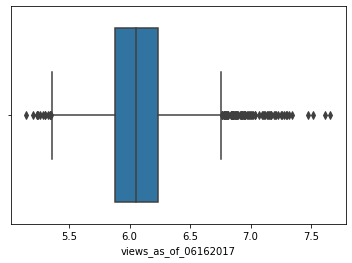

In [15]:
sns.boxplot(np.log10(df['views_as_of_06162017']))

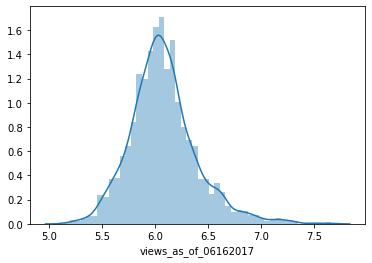

In [16]:
sns.distplot(np.log10(df['views_as_of_06162017']),norm_hist=True, kde=True)

<br>

The median number of views is around **$10^{6}$**
<br>

<br>

One important point here is, **the number of views on platform is depended on its number of days on platform** So At the very first step, we should be aware of the impact of time on the final prediction.  

There are multiple solutions to work around this issue, my initial thought is bringing the number of days on platform into my model as an additional attribute. That's one of the reason that feature engineering is a very important step before jumping into the model and conclusion.

## Feature Engineering

**- Days On Platform**

In [18]:
# Add new column as "days_on_platform" 
end_time = pd.to_datetime('06/16/17', format='%m/%d/%y')
df['days_on_platform'] = end_time - df['date_published']

In [19]:
# Change its type to integer 
df['days_on_platform'] = df['days_on_platform'].dt.days.astype(int)

<br>

**- Month & Year Published**


In [33]:
# Add two new column as 'month_published and year_published' 
df['month_published'] = df['date_published'].dt.month
df['year_published'] = df['date_published'].dt.year

<br>

**- Days On Platform**

since the number of views can not be comparable between videos that updated at different times, I came up with 
this attribute. 

In [31]:
# Add new colomn as "view_per_day" 
df['view_per_day'] = np.divide(df['views_as_of_06162017'], df['days_on_platform'] ) 

<br> 

**- Words per sec (speed)**
<br>

In [32]:
# Add new colomn as "word_per_sec"(speed) 
df['word_per_sec'] = df['WC']/df['duration']

<br>

**There are more Feature Engineering Steps in the "Text Analysis" Part that you will see later in this notebook.**
<br>

In order to be more focused on the attributes that play more important roles in this project, I make the new data frame as **df_lim** with specific attributes. 

In [83]:
# Creating focused dataframe for focusing more on them in the next steps
df_lim = df.loc[:,['id','event','duration','transcript','tags','month_filmed','year_filmed','date_published',
                   'month_published','year_published','days_on_platform',
                   'views_as_of_06162017','view_per_day' ,'WC','word_per_sec']].copy()

df_lim.head(6)

,id,event,duration,transcript,tags,month_filmed,year_filmed,date_published,month_published,year_published,days_on_platform,views_as_of_06162017,view_per_day,WC,word_per_sec
0,1,TED2006,977,"0:14\r\r\rThank you so much, Chris.\rAnd it's ...","cars,alternative energy,culture,politics,scien...",2,2006,2006-06-27,6,2006,4007,3177001.0,792.862740,2281.0,2.334698
1,2,TED2006,906,"0:11\r\r\rIn terms of invention,\rI'd like to ...","macarthur grant,simplicity,industrial design,a...",2,2006,2006-08-15,8,2006,3958,1379328.0,348.491157,2687.0,2.965784
2,3,TEDGlobal 2005,1125,"0:12\r\r\rA public, Dewey long ago observed,\r...","corruption,poverty,economics,investment,milita...",7,2005,2006-10-18,10,2006,3894,790536.0,203.013867,2506.0,2.227556
3,4,TED2006,1177,"0:11\r\r\rI want to start off by saying, Houst...","aircraft,flight,industrial design,nasa,rocket ...",2,2006,2006-10-25,10,2006,3887,1985119.0,510.707229,3092.0,2.627018
4,5,TED2002,1204,"0:12\r\r\rWhat I want to talk about is, as bac...","cars,industrial design,transportation,inventio...",2,2002,2007-04-05,4,2007,3725,859487.0,230.734765,3781.0,3.140365
5,6,TEDGlobal 2005,1011,"0:11\r\r\rAt the break, I was asked by several...","biotech,invention,oceans,genetics,dna,biology,...",7,2005,2007-04-05,4,2007,3725,555826.0,149.215034,2548.0,2.520277


In [84]:
df_lim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2386 entries, 0 to 2474
Data columns (total 15 columns):
id                      2386 non-null int64
event                   2386 non-null object
duration                2386 non-null int64
transcript              2386 non-null object
tags                    2386 non-null object
month_filmed            2386 non-null int64
year_filmed             2386 non-null int64
date_published          2386 non-null datetime64[ns]
month_published         2386 non-null int64
year_published          2386 non-null int64
days_on_platform        2386 non-null int64
views_as_of_06162017    2386 non-null float64
view_per_day            2386 non-null float64
WC                      2386 non-null float64
word_per_sec            2386 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(7), object(3)
memory usage: 298.2+ KB


### Initial Data Exploration


<br>

Now, Let's do very basic **correlation visualziation** on limited features to see if we can guide our project towards specfic direction before starting budilding models' steps.

<br>


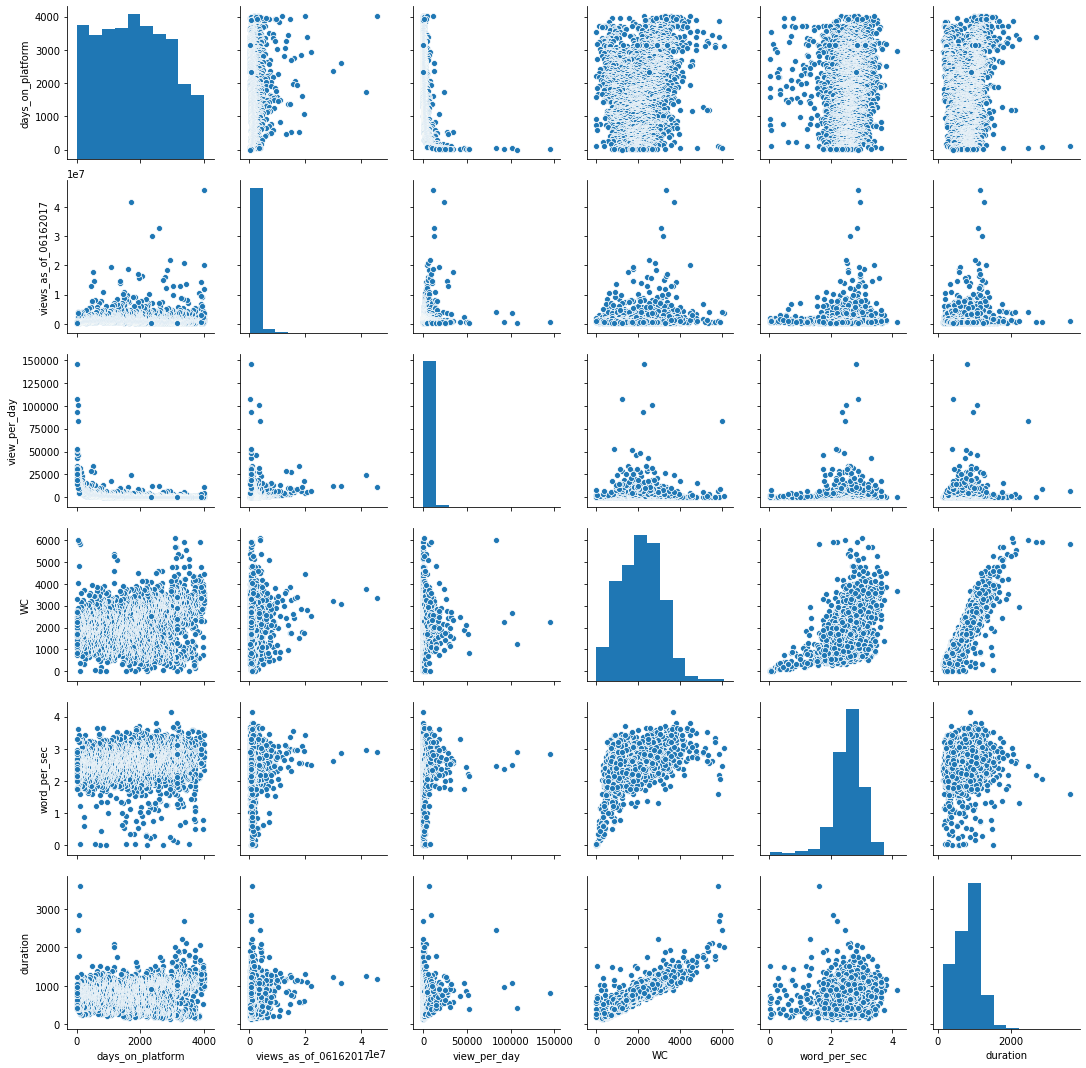

In [85]:
# Let's check some initial possible correlation on features
sns.pairplot(df_lim, vars=['days_on_platform','views_as_of_06162017','view_per_day','WC','word_per_sec','duration'])
plt.show()

<br>

And checking **Heatmap**

<br>

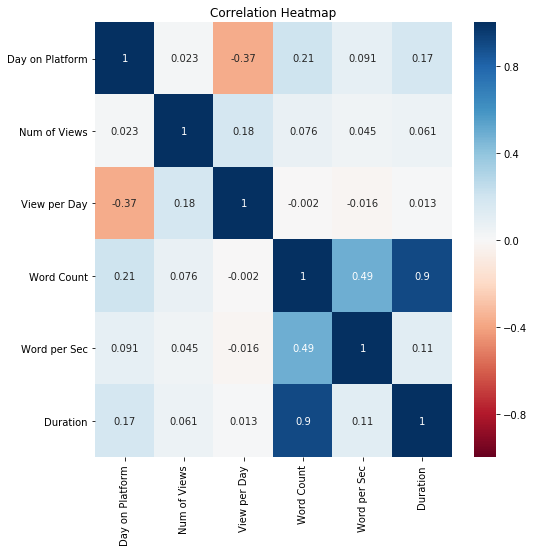

In [86]:
corr_data = df_lim[['days_on_platform','views_as_of_06162017','view_per_day' ,'WC','word_per_sec','duration']]
corr = corr_data.corr()

# plot the heatmap

plt.figure(figsize=(8, 8))
sns.heatmap(corr,cmap="RdBu",annot=True,xticklabels=['Day on Platform','Num of Views','View per Day','Word Count',
                                                     'Word per Sec','Duration'], 
            yticklabels=['Day on Platform','Num of Views','View per Day','Word Count','Word per Sec','Duration'],vmin=1,vmax=-1)

plt.title("Correlation Heatmap")
plt.show()

So basically, there is no significant relationship between raw initial attributes. 


Text(0.5, 0, 'Days on Platform')

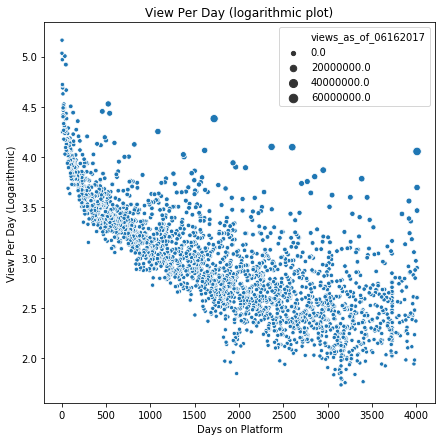

In [87]:
# Scatter plot of number of views per day (logarithmic) vs days on platform
plt.figure(figsize=(7, 7))
sns.scatterplot(y=np.log10(df_lim['view_per_day']) , x="days_on_platform", size="views_as_of_06162017", data=df_lim,ci=95,y_jitter=.03 )

plt.title("View Per Day (logarithmic plot)")
plt.ylabel("View Per Day (Logarithmic)")
plt.xlabel("Days on Platform")

Text(0.5, 0, 'Days on Platform')

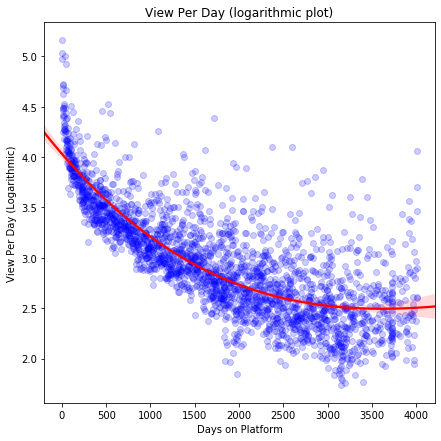

In [88]:
plt.figure(figsize=(7, 7))
ax = sns.regplot(y=np.log10(df_lim['view_per_day']) , x="days_on_platform", data=df_lim,ci=95, order=3,scatter_kws={"color": "blue","alpha":0.2}, line_kws={"color": "red"})

plt.title("View Per Day (logarithmic plot)")
plt.ylabel("View Per Day (Logarithmic)")
plt.xlabel("Days on Platform")

In [118]:
## Get the line of x=view_per_day , y=days_on_platform(log) : 

X = np.array(df_lim['days_on_platform'])
y = np.log10(np.array(df_lim['view_per_day']))

In [119]:
from numpy.polynomial import polynomial

In [120]:
c, stats = polynomial.polyfit(X,y,3,full=True)

In [121]:
x_new = np.linspace(0,4000,4000).reshape(-1,1)
y_new = c[0] + c[1] * x_new + c[2] * (x_new **2) + c[3] * (x_new **3)

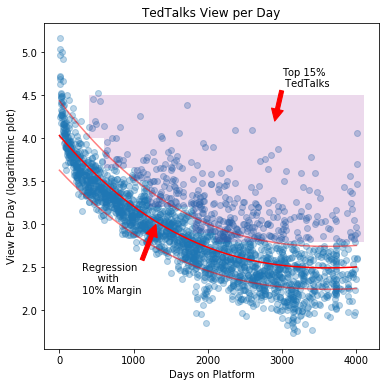

In [122]:
plt.figure(figsize=(6, 6))

plt.scatter(df_lim['days_on_platform'], np.log10(df_lim['view_per_day']),alpha=0.3)
plt.plot(x_new, y_new, color='r', alpha=1)
plt.plot(x_new, y_new*1.1, color='r', alpha=0.5)
plt.plot(x_new, y_new*0.9, color='r', alpha=0.5)
plt.title("TedTalks View per Day")
plt.ylabel("View Per Day (logarithmic plot)")
plt.xlabel("Days on Platform")
plt.annotate('Regression\n     with\n10% Margin', xy=(1300,3), xytext=(300,2.2), arrowprops={'color':'red','lw':1.05})
plt.fill_between([400,1000], 4, 4.5, facecolor='purple', alpha = .15, interpolate=True)
plt.fill_between([600,1000], 3.8, 4, facecolor='purple', alpha = .15, interpolate=True)
plt.fill_between([600,1000], 3.65, 3.8, facecolor='purple', alpha = .15, interpolate=True)
plt.fill_between([1000,4100], 3.5, 4.5, facecolor='purple', alpha = .15, interpolate=True)
plt.fill_between([1200,4100], 3.2, 3.5, facecolor='purple', alpha = .15, interpolate=True)
plt.fill_between([1800,4100], 2.9, 3.2, facecolor='purple', alpha = .15, interpolate=True)
plt.fill_between([2100,4100], 2.8, 2.9, facecolor='purple', alpha = .15, interpolate=True)
plt.annotate('Top 15%\n TedTalks', xy=(2900,4.2), xytext=(3000,4.6), arrowprops={'color':'red','lw':1.05})
plt.show()

So it seems that **Days on Platform** impacts the **View per Day** (as expected), therefore in the next steps, view per day is a very important feature to evaluate each talk performance. 

In other words, we can define a factor as **Released Effect** and in the first uploaded days videos of talks attract significantly higher attention compare to the next days.

For **normalizing the "view per day"**  attribute as my target variable of the model. I am calculating the difference between "view per day" and the "regression model" at each point! In other words: 

                         target variable = view_per_days - f(days_on_platform) 
                         
Be aware! The view_per_day feature is ***logarithmic*** 

### Target Variable  (normalizing the view_per_day)

In [123]:
# Using the created polynomial model to make the target variable 
x_var = df_lim['days_on_platform']
y_var = c[0] + c[1] * x_var + c[2] * (x_var **2) + c[3] * (x_var **3)

In [125]:
#Add target variable column
df_lim['target_var'] = np.log10(df_lim['view_per_day']) - y_var

Text(0.5, 0, 'Days on Platform')

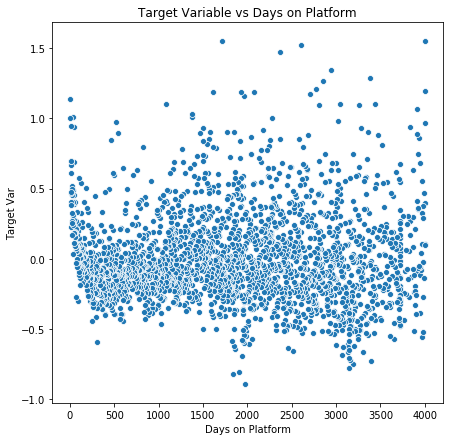

In [128]:
# Scatter plot of normalized target variable vs days on platform
plt.figure(figsize=(7, 7))
sns.scatterplot(y="target_var" , x="days_on_platform", data=df_lim,ci=95,y_jitter=.03 )

plt.title("Target Variable vs Days on Platform")
plt.ylabel("Target Var")
plt.xlabel("Days on Platform")

<br>

It's better to normalize it in the range of (0,1)
<br>

In [141]:
def normalizing_func(colname):
    return (colname - colname.min(0)) / (colname.max(0)-colname.min(0))

In [142]:
df_lim['target_var'] = normalizing_func(df_lim['target_var'])

Text(0.5, 0, 'Days on Platform')

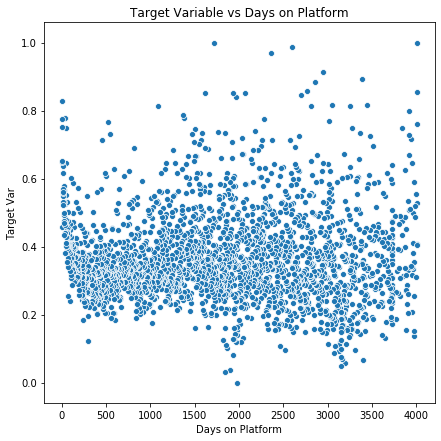

In [145]:
# Scatter plot of normalized target variable vs days on platform
plt.figure(figsize=(7, 7))
sns.scatterplot(y="target_var" , x="days_on_platform", data=df_lim,ci=95,y_jitter=.03 )

plt.title("Target Variable vs Days on Platform")
plt.ylabel("Target Var")
plt.xlabel("Days on Platform")

<br>

**So my final target variable is within the range of (0 , 1)**

<br>

<br>

Let's go to the next step which is focusing more on the **"Transcript"** and **"Tags"** features. 

### - 'tags' column

In [89]:
# make all tags lowercase 
df_lim['tags'] = df_lim['tags'].apply(lambda x : x.lower())

In [90]:
# make a 'List of tags'
df_lim['list_tags'] = df_lim['tags'].apply(lambda x : [word for word in x.split(',')])

<br>

Let's check **common tags**:
<br>

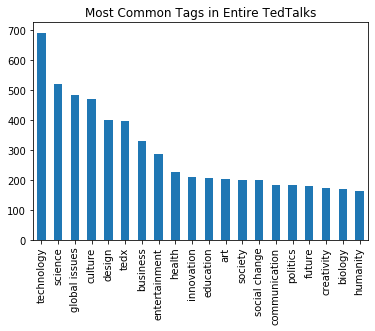

In [91]:
# Common tags of dataset: 
freq_tags = pd.Series(','.join(df_lim['tags']).split(',')).value_counts()
top_tags = freq_tags[:20]
plt.title("Most Common Tags in Entire TedTalks")
top_tags.plot.bar()

In [93]:
def common_tags_year(data,year=2006):
    data_year = data[data['year_published'] == year]
    freq_tags_year = pd.Series(','.join(data_year['tags']).split(',')).value_counts()
    top_tags_year = freq_tags_year[:10]
    return (top_tags_year.plot.bar())

In [94]:
@interact
def show_common_tags(year=(2006, 2017, 1)):
    return common_tags_year(df_lim,year)

interactive(children=(IntSlider(value=2011, description='year', max=2017, min=2006), Output()), _dom_classes=(…

As you would see, in the above interactive bar chart the common tags vary through times. For instance, it seems that the number of talks with Technology tags did not grow much while some tags like society increased.

### - 'transcript' column

Let's just take a glance one transcript entries first: 

In [96]:
df_lim['transcript'].iloc[1]

'0:11\r\r\rIn terms of invention,\rI\'d like to tell you the tale\rof one of my favorite projects.\rI think it\'s one of the most exciting\rthat I\'m working on,\rbut I think it\'s also the simplest.\r\r\r\r\r 0:21\r\r\rIt\'s a project that has the potential\rto make a huge impact around the world.\rIt addresses one of the biggest\rhealth issues on the planet,\rthe number one cause of death\rin children under five.\rWhich is ...?\rWater-borne diseases?\rDiarrhea? Malnutrition?\rNo.\rIt\'s breathing the smoke\rfrom indoor cooking fires \racute respiratory infections\rcaused by this.\rCan you believe that?\r\r\r\r\r 0:48\r\r\rI find this shocking\rand somewhat appalling.\rCan\'t we make\rcleaner burning cooking fuels?\rCan\'t we make better stoves?\rHow is it that this can lead\rto over two million deaths every year?\rI know Bill Joy was talking to you\rabout the wonders of carbon nanotubes,\rso I\'m going to talk to you\rabout the wonders of carbon macro-tubes,\rwhich is charcoal.\r\r\r

<br>

Having quick glans, I noticed there are some imporatant steps that I need to do in order to clean the transcripts. 

In addition, I can extract two other features **(laughter & applause counts)** from transcripts. 

<br>

#### - Laughter & Applause Counts

In [98]:
# reaction counter function 

def reaction_counter(text):
    reaction_dict = dict()
    reaction_dict['Applause'] = sum(1 for match in re.finditer(r"(\((?i)Applause)\)",text))
    reaction_dict['Laughter'] = sum(1 for match in re.finditer(r"(\((?i)Laughter)\)",text))
    return reaction_dict 

In [103]:
# make two new columns as a result of reaction counter function

df_lim['applause_count'] = df_lim['transcript'].apply(lambda x: reaction_counter(x)['Applause'])
df_lim['laughter_count'] = df_lim['transcript'].apply(lambda x: reaction_counter(x)['Laughter'])

In [105]:
df_lim

,id,event,duration,transcript,tags,month_filmed,year_filmed,date_published,month_published,year_published,days_on_platform,views_as_of_06162017,view_per_day,WC,word_per_sec,list_tags,applause count,laughter count,applause_count,laughter_count
0,1,TED2006,977,"0:14\r\r\rThank you so much, Chris.\rAnd it's ...","cars,alternative energy,culture,politics,scien...",2,2006,2006-06-27,6,2006,4007,3177001.0,792.862740,2281.0,2.334698,"[cars, alternative energy, culture, politics, ...",6,22,6,22
1,2,TED2006,906,"0:11\r\r\rIn terms of invention,\rI'd like to ...","macarthur grant,simplicity,industrial design,a...",2,2006,2006-08-15,8,2006,3958,1379328.0,348.491157,2687.0,2.965784,"[macarthur grant, simplicity, industrial desig...",1,8,1,8
2,3,TEDGlobal 2005,1125,"0:12\r\r\rA public, Dewey long ago observed,\r...","corruption,poverty,economics,investment,milita...",7,2005,2006-10-18,10,2006,3894,790536.0,203.013867,2506.0,2.227556,"[corruption, poverty, economics, investment, m...",1,1,1,1
3,4,TED2006,1177,"0:11\r\r\rI want to start off by saying, Houst...","aircraft,flight,industrial design,nasa,rocket ...",2,2006,2006-10-25,10,2006,3887,1985119.0,510.707229,3092.0,2.627018,"[aircraft, flight, industrial design, nasa, ro...",2,5,2,5
4,5,TED2002,1204,"0:12\r\r\rWhat I want to talk about is, as bac...","cars,industrial design,transportation,inventio...",2,2002,2007-04-05,4,2007,3725,859487.0,230.734765,3781.0,3.140365,"[cars, industrial design, transportation, inve...",1,4,1,4
5,6,TEDGlobal 2005,1011,"0:11\r\r\rAt the break, I was asked by several...","biotech,invention,oceans,genetics,dna,biology,...",7,2005,2007-04-05,4,2007,3725,555826.0,149.215034,2548.0,2.520277,"[biotech, invention, oceans, genetics, dna, bi...",0,2,0,2
6,7,TED2006,1286,"0:12\r\r\r(Music: ""The Sound of Silence,""\rSim...","simplicity,computers,software,interface design...",2,2006,2006-06-27,6,2006,4007,1619104.0,404.068879,3584.0,2.786936,"[simplicity, computers, software, interface de...",12,38,12,38
7,8,TED2002,1477,"0:13\r\r\rKurt Andersen: Like many architects,...","new york,memory,interview,death,culture,archit...",2,2002,2007-06-12,6,2007,3657,396025.0,108.292316,4008.0,2.713609,"[new york, memory, interview, death, culture, ...",0,1,0,1
8,9,TED2002,1207,"0:11\r\r\rAs you pointed out, every time you c...","robots,cars,industrial design,transportation,i...",2,2002,2007-04-05,4,2007,3725,670381.0,179.968054,3278.0,2.715824,"[robots, cars, industrial design, transportati...",3,5,3,5
9,10,TED2006,198,0:11\r\r\rWith all the legitimate concerns\rab...,"obesity,disease,health,health care,culture,foo...",2,2006,2006-12-14,12,2006,3837,2255796.0,587.906177,623.0,3.146465,"[obesity, disease, health, health care, cultur...",0,1,0,1


<br>

Some initial text cleaning steps include: 
    
    - Removing Numbers 
    - Changing some shorten version of language to more solid format (like: won't to will not)
    - Removing text symbols (like: \r)
    - Removing puncuations 
    - Removing reaction symbols (Laughter) and (Applause)
    - Lowercaseing 

In [195]:
# general transcript cleaner function

def transcript_cleaner(text):
    
    text = re.sub('\r', " " ,text)
    text = re.sub('\d+:\d+'," ",text)
    text = re.sub(' +'," ",text)
    
    # specific
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"(?i)let\'s", "let us", text)
    text = re.sub(r"(Laughter)","",text)
    text = re.sub(r"(Applause)","",text)
    text = re.sub("\(|\)|\"","",text)
    text = re.sub("\d","",text)

    # general
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'10s"," 10s", text)
    text = re.sub(r"\'20s"," 20s", text)
    text = re.sub(r"\'30s"," 30s", text)
    text = re.sub(r"\'40s"," 40s", text)
    text = re.sub(r"\'50s"," 50s", text)
    text = re.sub(r"\'60s"," 60s", text)
    text = re.sub(r"\'70s"," 70s", text)
    text = re.sub(r"\'80s"," 80s", text)
    text = re.sub(r"\'90s"," 90s", text)
    text = re.sub("\.|\?|\!|\-|\,|\:","", text)
    text = text.strip()
   
    
    return text.lower()

In [196]:
# clean the transcripts (using transcript_caleaner function)
df_lim['transcript_clean'] = df_lim['transcript'].apply(lambda x: transcript_cleaner(x))

In [197]:
# recheck one transcript!
df_lim['transcript_clean'].iloc[1]

'in terms of invention i would like to tell you the tale of one of my favorite projects i think it is one of the most exciting that i am working on but i think it is also the simplest it is a project that has the potential to make a huge impact around the world it addresses one of the biggest health issues on the planet the number one cause of death in children under five which is  waterborne diseases diarrhea malnutrition no it is breathing the smoke from indoor cooking fires acute respiratory infections caused by this can you believe that i find this shocking and somewhat appalling ca not we make cleaner burning cooking fuels ca not we make better stoves how is it that this can lead to over two million deaths every year i know bill joy was talking to you about the wonders of carbon nanotubes so i am going to talk to you about the wonders of carbon macrotubes which is charcoal  so this is a picture of rural haiti haiti is now  percent deforested you will see scenes like this all over 

<br>

So the transcript looks clean, however for training ML model, I will do extra steps such as removing stop words (I, is, and, ...), and do some lemmazitation. 

<br> 

## 'tags' column

In [229]:
# define the tag_cleaner function - I used this function to preprocess tags before TFIDF step in my model

def tag_cleaner(tag):
    tag = re.sub(" ","-",tag)
    tag = re.sub(","," ",tag)
    
    return tag

In [230]:
df_lim['tag_clean'] = df_lim['tags'].apply(lambda x : tag_cleaner(x))



## Training Model

<br>


In [233]:
from sklearn.feature_extraction.text import CountVectorizer
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score,make_scorer, mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion
from sklearn import utils
from sklearn.utils import shuffle
import spacy

In [232]:
nlp = spacy.load('en')

In [198]:
def tokenize_lemma(text):
    return [w.lemma_.lower() for w in nlp(text)]

In [243]:
# Now I need to make train and test datasets, I can do with train_test_split or do the shuffle and split
X_samp_model , y_samp_model = utils.shuffle(df_lim[['transcript_clean','tag_clean']], df_lim['target_var'], random_state=42)

In [247]:
# Making train and test splits 
X_train = X_samp_model[:1700]
y_train = y_samp_model[:1700]
X_test = X_samp_model[1700:]
y_test = y_samp_model[1700:]

In [248]:
# Making the transformer using two columns (transcript and tags)

union_features = Pipeline([('features',FeatureUnion([('text_est', Pipeline([('text_selector', FunctionTransformer(lambda x: x['transcript_clean'],validate=False)),
                                                   ('text_tfidf', TfidfVectorizer(ngram_range=(1,2),
                                                                    stop_words=STOP_WORDS, 
                                                                    tokenizer=tokenize_lemma))
                                                  ])),
                            
                            ('tag_est', Pipeline([('tag_selector',FunctionTransformer(lambda x: x['tag_clean'], validate=False)),
                                                  ('tag_tfidf', TfidfVectorizer(ngram_range=(1,1)))
                                                 ]))
                                                 ])),
                           ('regressor',Ridge(alpha=0.2))])

In [249]:
# Training the model
union_features.fit(X_train,y_train)

/Users/rtmac/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'", '-pron-', 'd', 'm', 'regard', 'use', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Pipeline(memory=None,
         steps=[('features',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('text_est',
                                                 Pipeline(memory=None,
                                                          steps=[('text_selector',
                                                                  FunctionTransformer(accept_sparse=False,
                                                                                      check_inverse=True,
                                                                                      func=<function <lambda> at 0x1a4d08cf28>,
                                                                                      inv_kw_args=None,
                                                                                      inverse_func=None,
                                                                                      kw_args=None,
                                         

In [251]:
# Making prediction
y_pred = union_features.predict(X_test)

In [255]:
# Checking Some prediction
y_pred

array([0.2893165 , 0.30013234, 0.40368713, 0.44567011, 0.50210083,
       0.3660578 , 0.45209542, 0.37746629, 0.46641966, 0.53939395,
       0.33690585, 0.23604465, 0.45520143, 0.43724931, 0.34866571,
       0.2913379 , 0.29443008, 0.33962799, 0.36153071, 0.2979975 ,
       0.42685422, 0.32886433, 0.36720923, 0.28043007, 0.47504354,
       0.37224084, 0.28763394, 0.46993043, 0.30453557, 0.35388109,
       0.33683864, 0.49103601, 0.35409653, 0.35740686, 0.42067049,
       0.35757526, 0.36022688, 0.33579339, 0.43827288, 0.34277032,
       0.36972662, 0.45226404, 0.40976805, 0.40046441, 0.23669692,
       0.42910257, 0.34093392, 0.31024331, 0.40192472, 0.31759949,
       0.39994832, 0.28883158, 0.25001551, 0.31066433, 0.32972659,
       0.56467112, 0.32633694, 0.35895594, 0.37452657, 0.47350144,
       0.3310712 , 0.35099859, 0.38951848, 0.50451754, 0.43787477,
       0.31192359, 0.43312444, 0.38123586, 0.40035131, 0.44378315,
       0.38152266, 0.38538081, 0.36449858, 0.28503864, 0.20465

In [268]:
# Model Score (mean sqaured error)
sqr_diff = (y_pred - y_test) **2 
model_mean_r_sqrd = (sum(sqr_diff))/ len(y_pred)

In [278]:
print ('The mean R squared of this model is: %f' %model_mean_r_sqrd)

The mean R squared of this model is: 0.014099


In [282]:
import sys

In [285]:
from wordcloud import WordCloud, STOPWORDS

### Wordcloud for top 200 Talks

In [287]:
# Top 200 Talks based on the target_var

df_top_200 = df_lim.sort_values(by=['target_var'], ascending=False).iloc[:200].copy()

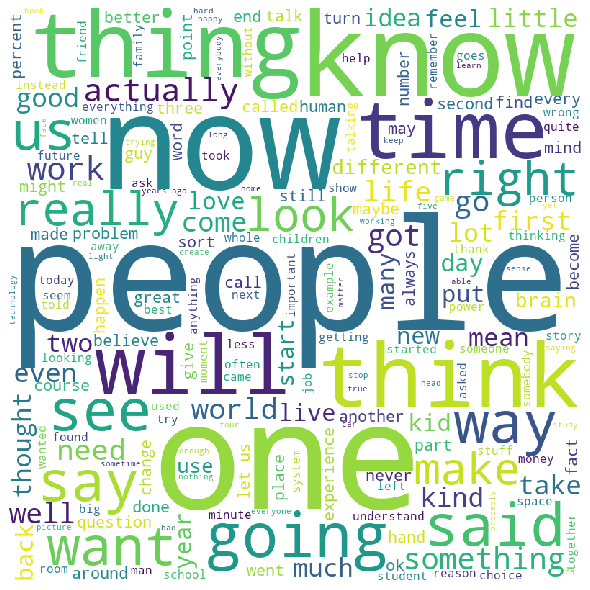

In [291]:
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df_top_200.transcript_clean: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()